In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

Understand the data

In [2]:
data = pd.read_csv('/content/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
data.shape[0]

918

In [7]:
data.shape[1]

12

In [8]:
list(data.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# **Calculate (mean, median, standard deviation)**

*   List item
*   List item



In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
df = data

# **HeatMap to understand the realtionship between the features.**







<Axes: >

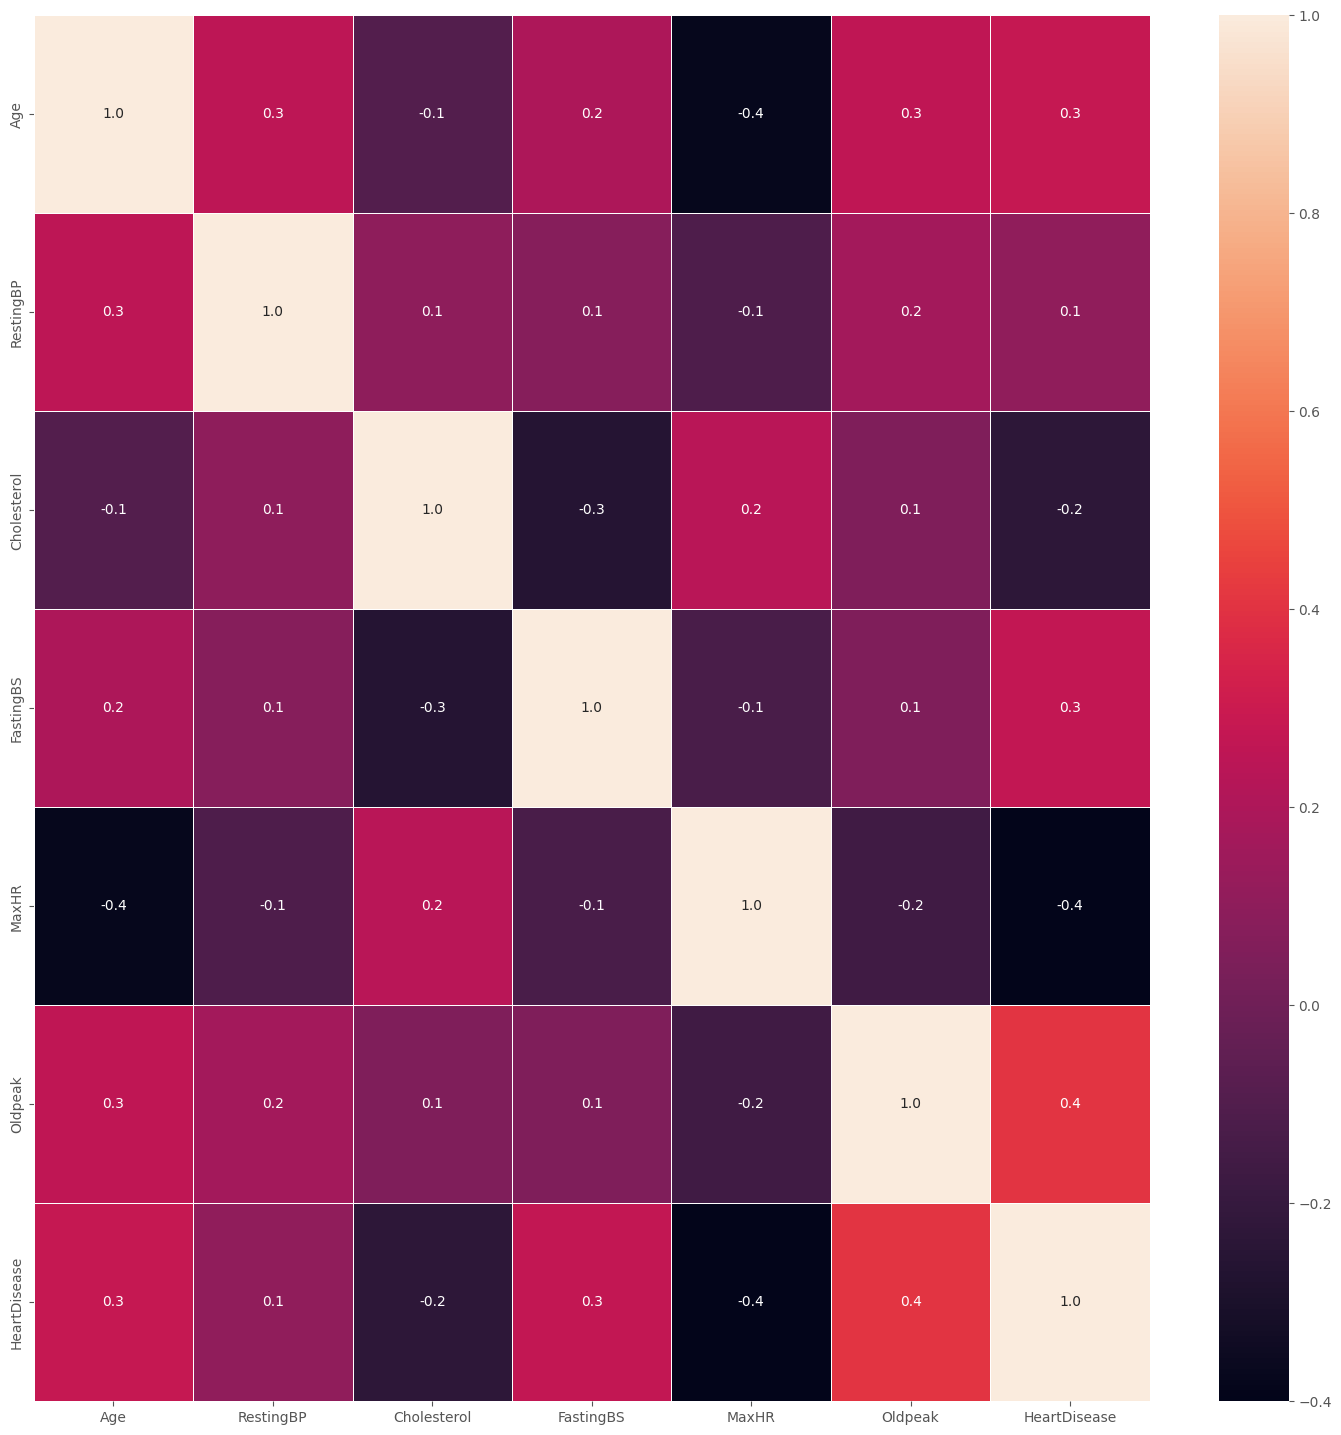

In [12]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns



#Correlation map. Find correlation between features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [13]:
fig=px.histogram(df,
                x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [14]:
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [15]:

fig=px.histogram(df,
                 x="FastingBS",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [16]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [17]:
fig=px.histogram(df,
                 x="ExerciseAngina",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [18]:
fig=px.histogram(df,
                 x="Age",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

Data **preprocessing**

Outliers

In [19]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

 Handling Messing Values:


In [20]:
data.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [21]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Handling duplicated values:

In [22]:
data.duplicated().any()

False

In [23]:
data[['Age','Sex','RestingBP','Cholesterol',  'FastingBS',  'RestingECG' , 'ExerciseAngina' , 'Oldpeak'   ,'ST_Slope'  ]]


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,140,289,0,Normal,N,0.0,Up
1,49,F,160,180,0,Normal,N,1.0,Flat
2,37,M,130,283,0,ST,N,0.0,Up
3,48,F,138,214,0,Normal,Y,1.5,Flat
4,54,M,150,195,0,Normal,N,0.0,Up
5,39,M,120,339,0,Normal,N,0.0,Up
6,45,F,130,237,0,Normal,N,0.0,Up
7,54,M,110,208,0,Normal,N,0.0,Up
8,37,M,140,207,0,Normal,Y,1.5,Flat
9,48,F,120,284,0,Normal,N,0.0,Up


In [24]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
sex

,M
0,1
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [25]:
RestingECG = pd.get_dummies(data['RestingECG'], drop_first=True)
RestingECG

,Normal,ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [26]:
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'], drop_first=True)
ExerciseAngina

,Y
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [27]:
ST_Slope = pd.get_dummies(data['ST_Slope'], drop_first=True)
ST_Slope

,Flat,Up
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


In [28]:
data = pd.concat([data, sex, RestingECG , ExerciseAngina , ST_Slope], axis=1)



In [29]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,M,Normal,ST,Y,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,1,0,0,0,1
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,1,1,0,0,0,1
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0,0,1,0,0,0,1
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,1,1,0,0,0,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,1,1,0,1,1,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0,0,1,0,0,0,1


In [30]:
data.drop(['Sex' ,   'RestingECG'    ,  'ChestPainType', 'ExerciseAngina' ,  'ST_Slope'  , 'MaxHR' ], axis=1 , inplace=True  )





In [31]:
data

,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease,M,Normal,ST,Y,Flat,Up
0,40,140,289,0,0.0,0,1,1,0,0,0,1
1,49,160,180,0,1.0,1,0,1,0,0,1,0
2,37,130,283,0,0.0,0,1,0,1,0,0,1
3,48,138,214,0,1.5,1,0,1,0,1,1,0
4,54,150,195,0,0.0,0,1,1,0,0,0,1
5,39,120,339,0,0.0,0,1,1,0,0,0,1
6,45,130,237,0,0.0,0,0,1,0,0,0,1
7,54,110,208,0,0.0,0,1,1,0,0,0,1
8,37,140,207,0,1.5,1,1,1,0,1,1,0
9,48,120,284,0,0.0,0,0,1,0,0,0,1


In [32]:
data.rename(columns={'M' : 'Gender'},inplace=True)

In [33]:
data

,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease,Gender,Normal,ST,Y,Flat,Up
0,40,140,289,0,0.0,0,1,1,0,0,0,1
1,49,160,180,0,1.0,1,0,1,0,0,1,0
2,37,130,283,0,0.0,0,1,0,1,0,0,1
3,48,138,214,0,1.5,1,0,1,0,1,1,0
4,54,150,195,0,0.0,0,1,1,0,0,0,1
5,39,120,339,0,0.0,0,1,1,0,0,0,1
6,45,130,237,0,0.0,0,0,1,0,0,0,1
7,54,110,208,0,0.0,0,1,1,0,0,0,1
8,37,140,207,0,1.5,1,1,1,0,1,1,0
9,48,120,284,0,0.0,0,0,1,0,0,0,1


In [34]:
data['Gender'].value_counts()

1    725
0    193
Name: Gender, dtype: int64

Training model


In [35]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
heart = datasets.load_iris()

In [36]:
X = data.drop("HeartDisease", axis = 1)
y = data['HeartDisease']

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [39]:
X_train.shape

(642, 11)

In [40]:
X_test.shape

(276, 11)

In [41]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [42]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))
print('Error:',1-accuracy_score(y_test, y_pred) )

Accuracy: 0.8804347826086957
f1_score: 0.888135593220339
Error: 0.11956521739130432


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       130
           1       0.88      0.90      0.89       146

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predgnb= gnb.predict(X_test)
print("gnb Accuracy:",metrics.accuracy_score(y_test, y_predgnb))
print('f1_score:',f1_score(y_test, y_predgnb))
print('Error:',1-accuracy_score(y_test, y_predgnb) )

gnb Accuracy: 0.8768115942028986
f1_score: 0.8835616438356163
Error: 0.12318840579710144


In [45]:
from sklearn.naive_bayes import BernoulliNB
Bnb = BernoulliNB()
Bnb.fit(X_train, y_train)
y_predbnb= Bnb.predict(X_test)
print("Bnb Accuracy:",metrics.accuracy_score(y_test, y_predbnb))
print('f1_score:',f1_score(y_test, y_predbnb))
print('Error:',1-accuracy_score(y_test, y_predbnb) )

Bnb Accuracy: 0.8586956521739131
f1_score: 0.8677966101694914
Error: 0.14130434782608692


In [46]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_predsvc = model.predict(X_test)
print("SVC Accuracy:", metrics.accuracy_score(y_test, y_predsvc))
print('f1_score:',f1_score(y_test, y_predsvc))
print('Error:',1-accuracy_score(y_test, y_predsvc) )

SVC Accuracy: 0.8695652173913043
f1_score: 0.8767123287671232
Error: 0.13043478260869568


In [47]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier with specified parameters
model = DecisionTreeClassifier(max_depth=4, min_samples_split=276, criterion='gini')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_predDC = model.predict(X_test)

# Calculate and print the accuracy of the model
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_predDC))
print('f1_score:',f1_score(y_test, y_predDC))
print('Error:',1-accuracy_score(y_test, y_predDC) )

Decision Tree Accuracy: 0.8405797101449275
f1_score: 0.8493150684931505
Error: 0.1594202898550725


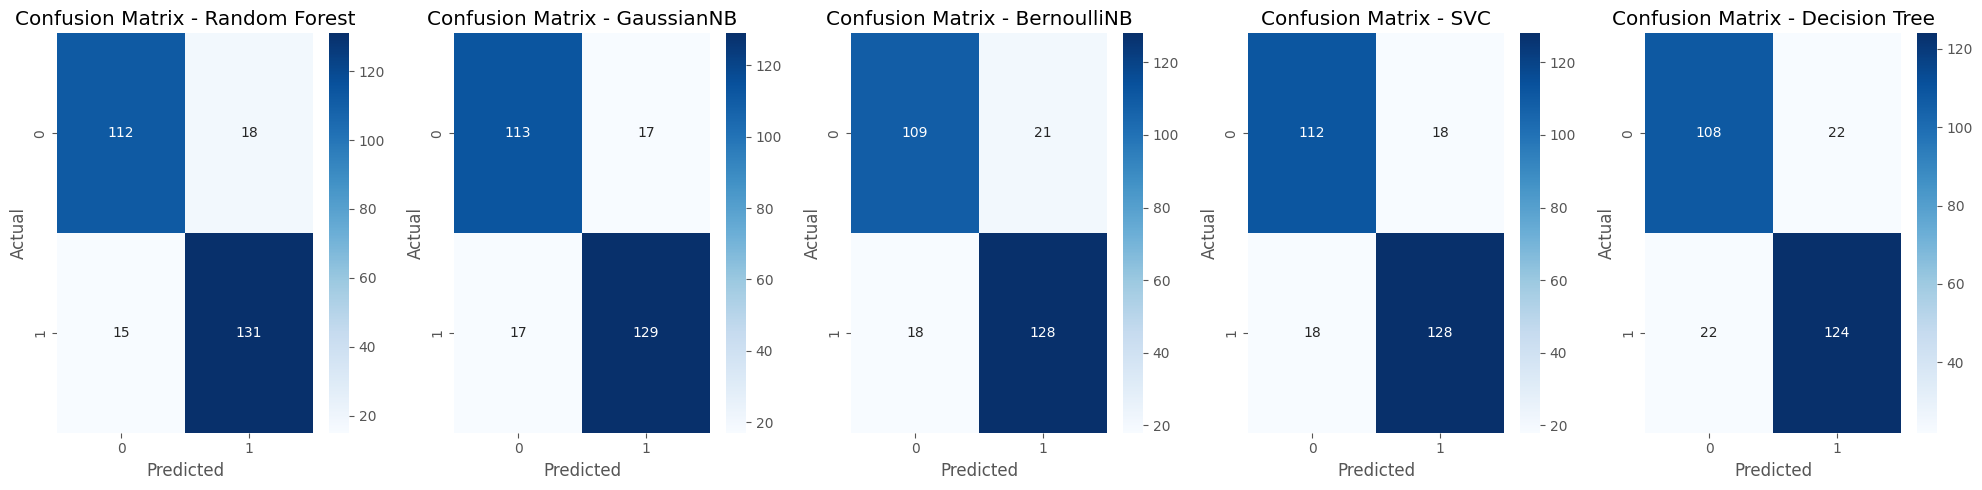

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the classifiers and their respective confusion matrices
classifiers = ['Random Forest', 'GaussianNB', 'BernoulliNB', 'SVC', 'Decision Tree']
confusion_matrices = [confusion_matrix(y_test, y_pred),
                      confusion_matrix(y_test, y_predgnb),
                      confusion_matrix(y_test, y_predbnb),
                      confusion_matrix(y_test, y_predsvc),
                      confusion_matrix(y_test, y_predDC)]

# Create subplots for each confusion matrix
fig, axes = plt.subplots(1, len(classifiers), figsize=(20, 5))

# Iterate over classifiers and confusion matrices to plot
for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {classifiers[i]}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

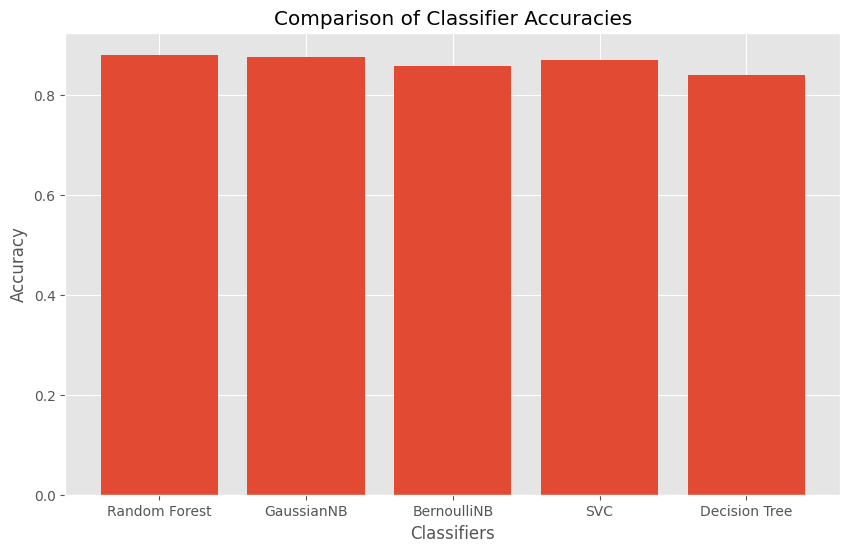

In [49]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest', 'GaussianNB', 'BernoulliNB', 'SVC', 'Decision Tree']
accuracy_scores = [metrics.accuracy_score(y_test, y_pred),
                   metrics.accuracy_score(y_test, y_predgnb),
                   metrics.accuracy_score(y_test, y_predbnb),
                   metrics.accuracy_score(y_test, y_predsvc),
                   metrics.accuracy_score(y_test, y_predDC)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores)

# Set the plot labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')

# Display the plot
plt.show()

In [50]:
import pandas as pd

classifiers = ['Random Forest', 'GaussianNB', 'BernoulliNB', 'SVC', 'Decision Tree']
accuracy_scores = [metrics.accuracy_score(y_test, y_pred),
                   metrics.accuracy_score(y_test, y_predgnb),
                   metrics.accuracy_score(y_test, y_predbnb),
                   metrics.accuracy_score(y_test, y_predsvc),
                   metrics.accuracy_score(y_test, y_predDC)]

results_df = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accuracy_scores})
print(results_df)

      Classifier  Accuracy
0  Random Forest  0.880435
1     GaussianNB  0.876812
2    BernoulliNB  0.858696
3            SVC  0.869565
4  Decision Tree  0.840580
